<a href="https://colab.research.google.com/github/datbui091023/Asignement1/blob/main/key.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import torch
from sklearn.preprocessing import MinMaxScaler

In [ ]:
linear_data = pd.read_csv('data_linear.csv')

In [ ]:
# .iloc <=> Extract Data from DataFrame to Series
# values <=> Convert data from Series to 1D Numpy array
# reshape(-1,1) <=> Convert 1D Numpy Array to 2D numpy array, 1: number of column, -1: number of row (automatic calculate from number of elements)
X_linear = linear_data.iloc[:,0].values.reshape(-1,1)
y_linear = linear_data.iloc[:,1].values.reshape(-1,1)

In [ ]:
# Normalize Data
X_linear=MinMaxScaler().fit_transform(X_linear)
y_linear=MinMaxScaler().fit_transform(y_linear)

Text(0, 0.5, 'giá/100')

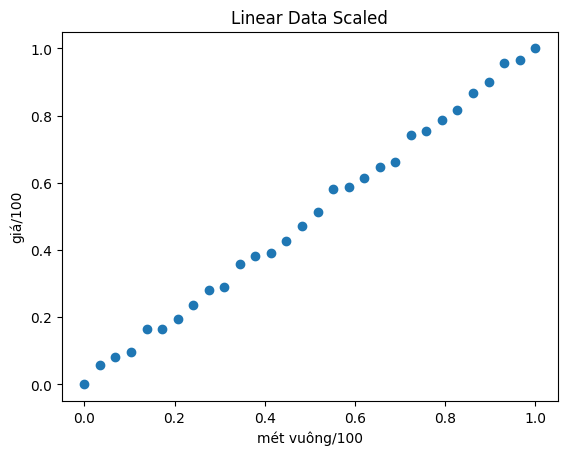

In [ ]:
#Visualize Scaled Data
plt.scatter(X_linear, y_linear)
plt.title('Linear Data Scaled')
plt.xlabel('mét vuông/100')
plt.ylabel('giá/100')

In [ ]:
#Gợi ý:
#- Viết code tính hàm loss function
#- Viết code tính gradient descent
#- Viết code tính giá trị model dự đoán được
# ....
# Có thể tham khảo tại Assignment HW1 đã làm

In [ ]:
# Function to compute Mean Squared Error (MSE) loss
def compute_loss(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    loss = np.sum((predictions - y) ** 2) / (2 * m)
    return loss

In [ ]:
# Function to perform gradient descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    loss_history = []

    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = X.T.dot(errors) / m
        theta -= learning_rate * gradient
        loss = compute_loss(X, y, theta)
        loss_history.append(loss)

    return theta, loss_history

In [ ]:
# Add a column of ones to X for the bias term
X_linear = np.c_[np.ones(X_linear.shape[0]), X_linear]

In [ ]:
# Initialize theta with zeros
theta_initial = np.zeros((X_linear.shape[1], 1))

In [ ]:
# Set hyperparameters
learning_rate = 0.1
iterations = 1000

In [ ]:
# Perform gradient descent
theta_final, loss_history = gradient_descent(X_linear, y_linear, theta_initial, learning_rate, iterations)

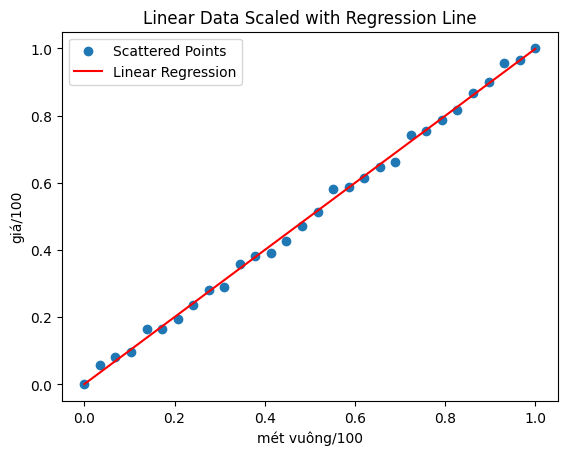

In [ ]:
# Visualize the scattered points
plt.scatter(X_linear[:, 1], y_linear, label='Scattered Points')

# Visualize the linear regression fit
plt.plot(X_linear[:, 1], X_linear.dot(theta_final), color='red', label='Linear Regression')

# Add labels and legend
plt.title('Linear Data Scaled with Regression Line')
plt.xlabel('mét vuông/100')
plt.ylabel('giá/100')
plt.legend()

# Show the plot
plt.show()
